In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression,fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import utils_profe
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

Instrucciones:

 1. Carga y Exploración de Datos:

    * Cargar el dataset Boston Housing y revisar su estructura básica.
  
      Fue removido por cuestiones eticas, vamos california_housing.

In [2]:
# Cargar el dataset California Housing
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target
print(X.shape)
print(X.columns)
X.head()

(20640, 8)
Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Describir las variables y su distribución.

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -1

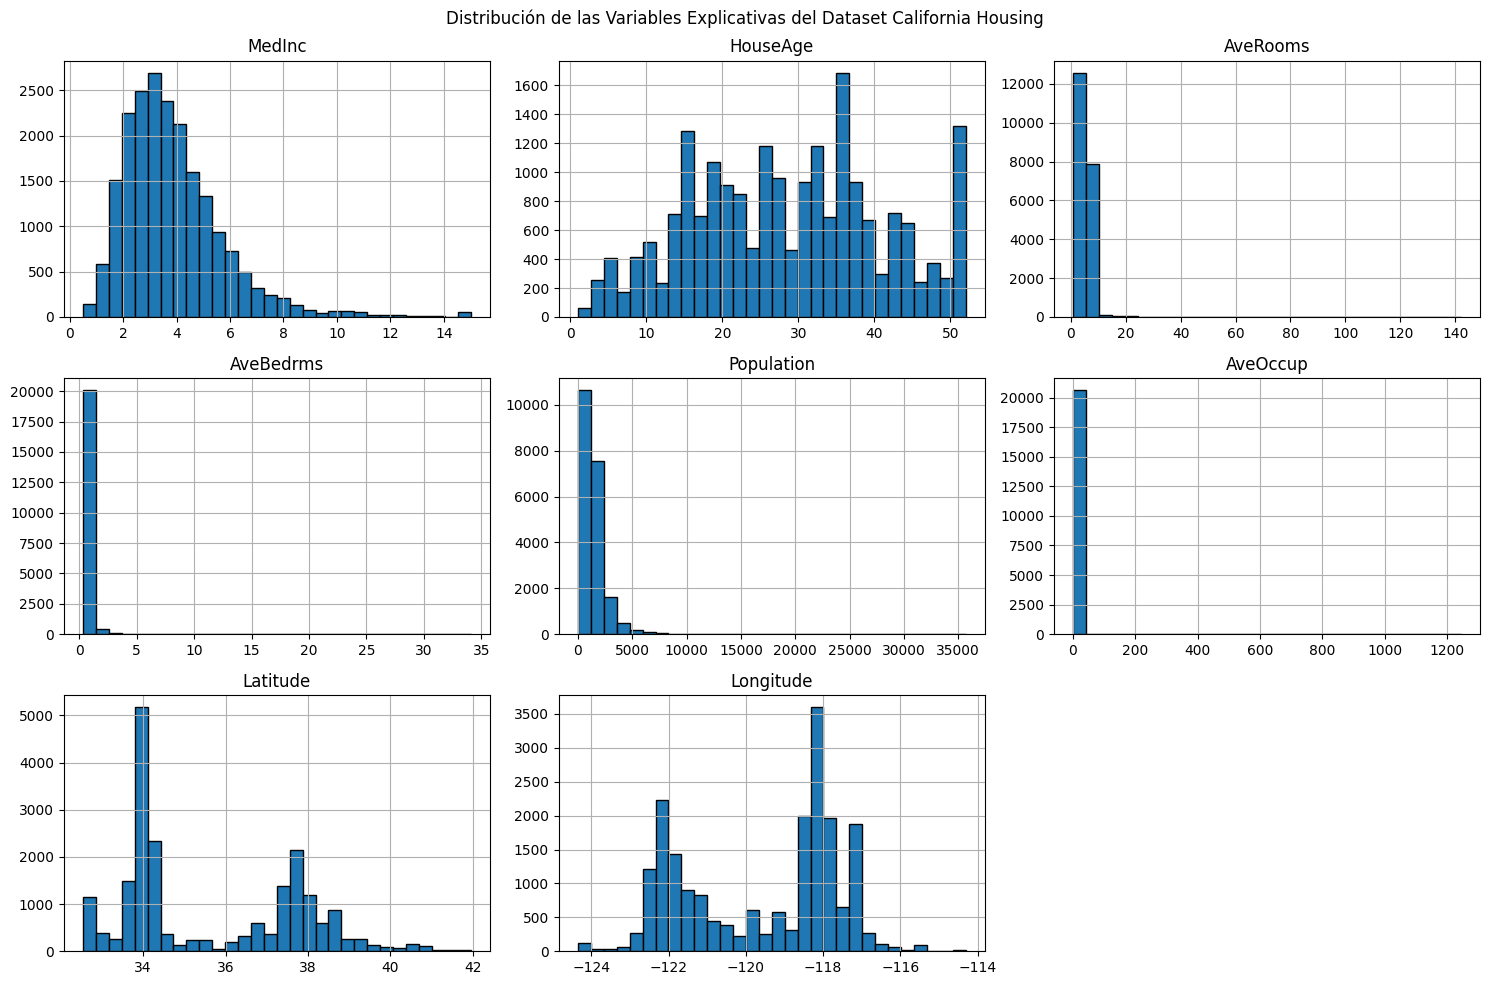

In [3]:
print(X.describe())
# Crear histogramas para cada característica
X.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribución de las Variables Explicativas del Dataset California Housing')
plt.tight_layout()
plt.show()

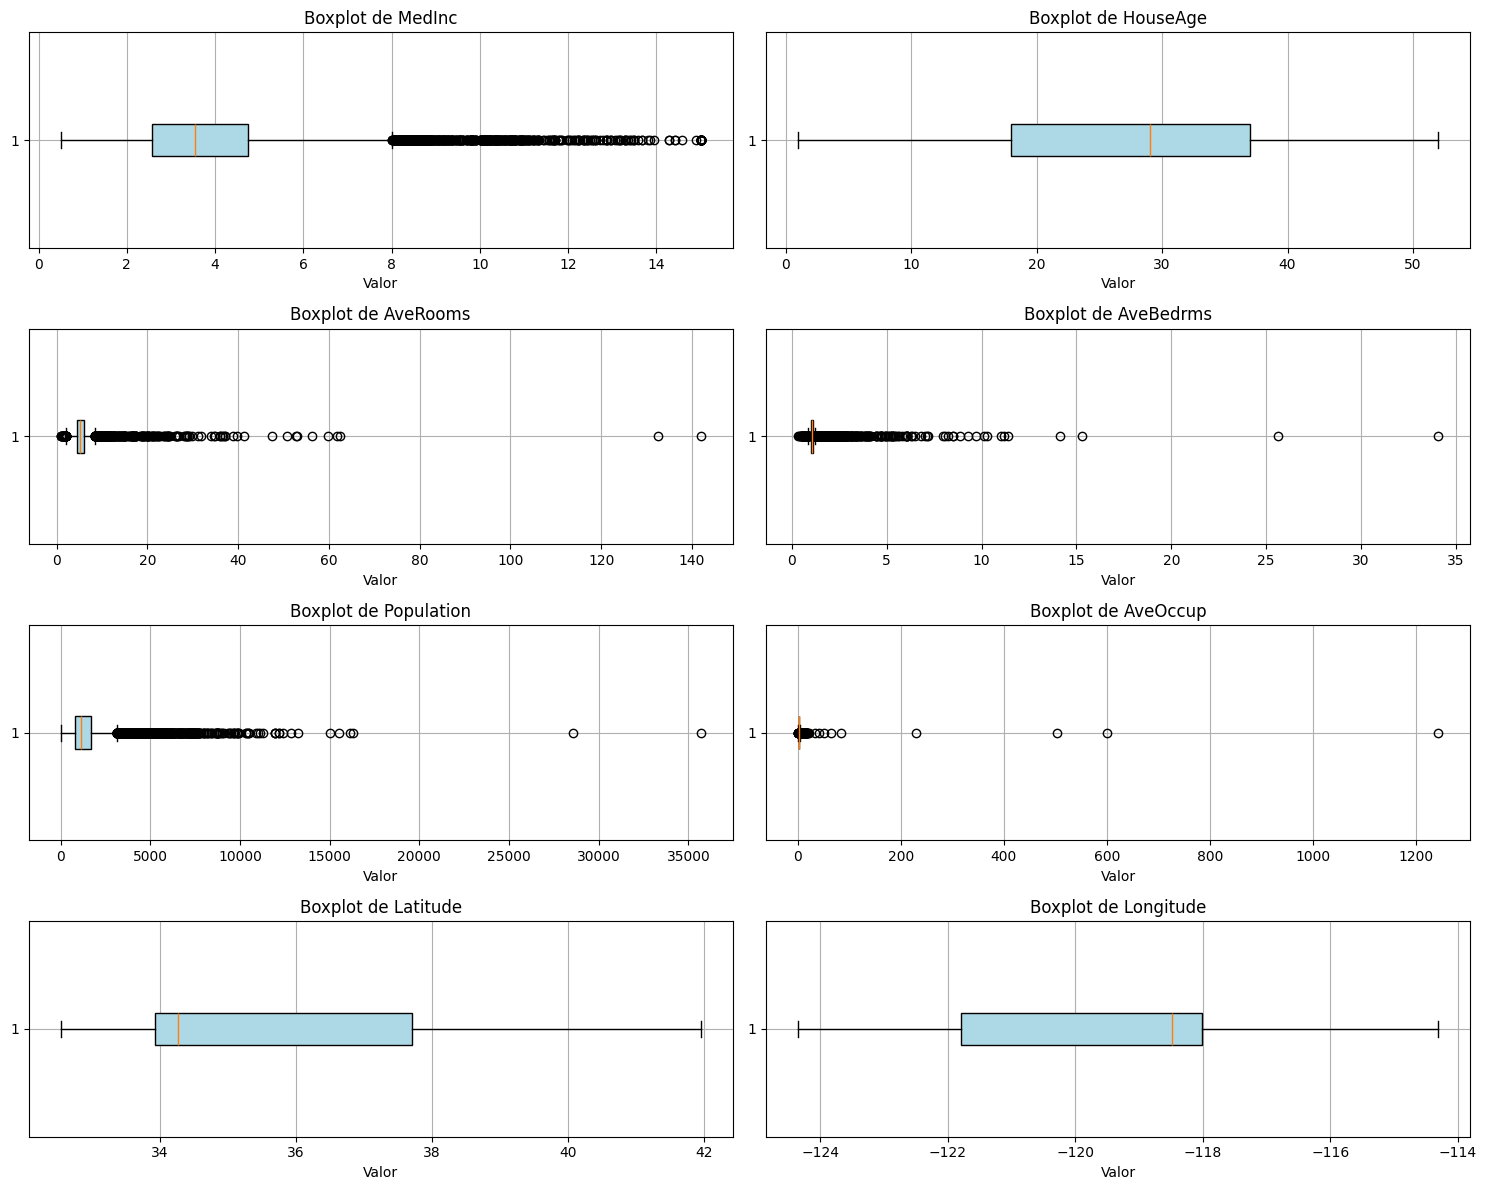

In [4]:
# Crear gráficos de boxplot separados para cada característica
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Graficar cada variable en un boxplot separado
for i, col in enumerate(X.columns):
    axes[i].boxplot(X[col], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xlabel('Valor')
    axes[i].grid()

# Ajustar el diseño
plt.tight_layout()
plt.show()

Detectar y tratar valores nulos.

In [7]:
utils_profe.calculate_na_statistics(X)

,datos sin NAs en q,Na en q,Na en %
MedInc,20640,0,0.0
HouseAge,20640,0,0.0
AveRooms,20640,0,0.0
AveBedrms,20640,0,0.0
Population,20640,0,0.0
AveOccup,20640,0,0.0
Latitude,20640,0,0.0
Longitude,20640,0,0.0


In [10]:
df = data.frame
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


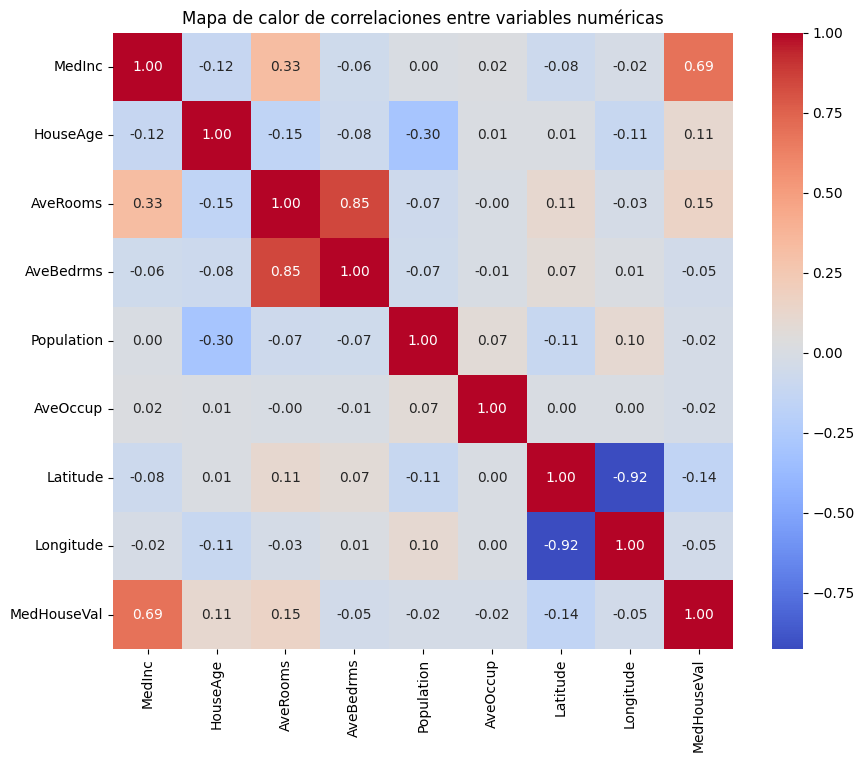

In [12]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_columns].corr()

# Graficar el heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Mapa de calor de correlaciones entre variables numéricas')
plt.show()

2. Preprocesamiento:

Error Cuadrático Medio (MSE): 658.84
Coeficiente de Determinación (R²): 0.92
Error Cuadrático Absoluto (MAE): 20.62


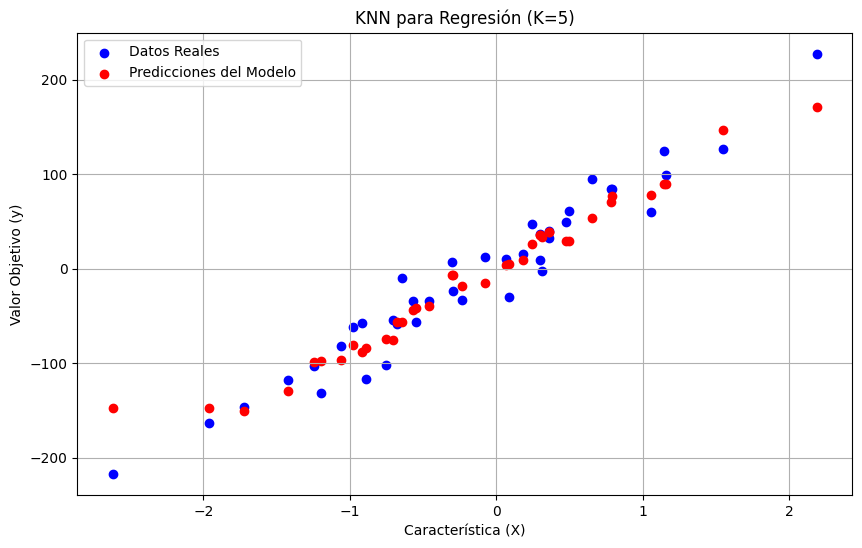

In [14]:
# Generar un dataset sintético para regresión
X, y = make_regression(n_samples=200, n_features=1, noise=20, random_state=42)

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos con StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo KNN para regresión con K=5
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Ajustar el modelo a los datos de entrenamiento
knn_regressor.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn_regressor.predict(X_test_scaled)

# Calcular métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Mostrar resultados
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")
print(f"Error Cuadrático Absoluto (MAE): {mae:.2f}")

# Visualizar los datos y la predicción del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.scatter(X_test, y_pred, color='red', label='Predicciones del Modelo')
plt.xlabel('Característica (X)')
plt.ylabel('Valor Objetivo (y)')
plt.title('KNN para Regresión (K=5)')
plt.legend()
plt.grid()
plt.show()

In [25]:
# Regresion lineal con 5 hyper parámetros
model = LinearRegression(
    fit_intercept= True,      # Si se debe calcular el intercepto
    #normalize = 'deprecated', # Normalizar los datos, opcion deprecada
    copy_X=True,              # Si se debe hacer una copia de X
    n_jobs=None,              # Numero de procesadores a utilizar. None es usar uno
    positive=False            # Si se deben forzar los coeficientes para que sea positivos
)
# El modelo tiene diferentes tipos de parámetros(?) o de funciones.
# fit es el entrenamiento (en standard scaler, one hor encoder o cualquier otro modelo que puedan transformar los datos es entrenamiento)
# Se deben notar que le pasamos las entradas y las salidas que deben tener, x es entrada, y es salida. Son entradas y salidas para el entrenamiento.
# El resultado es un modelo entrenado.
model.fit(X_train_scaled, y_train)

# Cuando el modelo ya fue entrenado, lo ponemos a predecir.
# Aqui solo le pasamos la entrada. La salida es el resultado a predecir.
y_pred = model.predict(X_test_scaled)

# Evaluar el rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")
print(f"Error Cuadrático Absoluto (MAE): {mae:.2f}")

Error Cuadrático Medio (MSE): 437.55
Coeficiente de Determinación (R²): 0.94
Error Cuadrático Absoluto (MAE): 16.04


In [26]:
# Entrenamiento del modelo Árbol de Decisión
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = tree.predict(X_test_scaled)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")
print(f"Error Cuadrático Absoluto (MAE): {mae:.2f}")

Error Cuadrático Medio (MSE): 913.73
Coeficiente de Determinación (R²): 0.89
Error Cuadrático Absoluto (MAE): 24.40


In [27]:
# Entrenar el modelo RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


# Realizar predicciones
y_pred = rf.predict(X_test)
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")
print(f"Error Cuadrático Absoluto (MAE): {mae:.2f}")

Error Cuadrático Medio (MSE): 727.63
Coeficiente de Determinación (R²): 0.91
Error Cuadrático Absoluto (MAE): 21.80


 4. Benchmarking y Comparación de Modelos:

| Comparación                       | KNN(12) | Regresión Lineal | Arbol  | RandomForestRegressor |
|-----------------------------------|---------|------------------|--------|-----------------------|
| Error Cuadrático Medio            | 658.84  | 437.55           | 913.73 | 727.63                |
| Coeficiente de Determinación (R²) | 0.92    | 0.94             | 0.89   | 0.91                  |
| Error Cuadrático Absoluto (MAE)   | 20.62   | 16.04            | 24.4   | 21.8                  |


El modelo que mejor desempeño tiene es Regresión Lineal debido a que explica la variabilidad en un 94% de los casos

Discutir cuál modelo ofrece el mejor rendimiento y por qué.

Identificar las fortalezas y debilidades de cada enfoque en este contexto.